```pip install box2d-py``` after installing Visual C++ and rebooting.

In [1]:
from importlib import reload
import cartpole_lab.charts
reload(cartpole_lab.charts)

import numpy as np
import gym
import cartpole_lab.agent
import cartpole_lab.deeprico
import cartpole_lab.approximator
reload(cartpole_lab.agent)
reload(cartpole_lab.deeprico)
reload(cartpole_lab.approximator)
from cartpole_lab.deeprico import deep_rico

env = gym.make('LunarLander-v2')
observation = env.reset()

Using TensorFlow backend.
[2019-11-26 11:30:47,828] Making new env: LunarLander-v2


avg of last 100 episodes: -126.518837


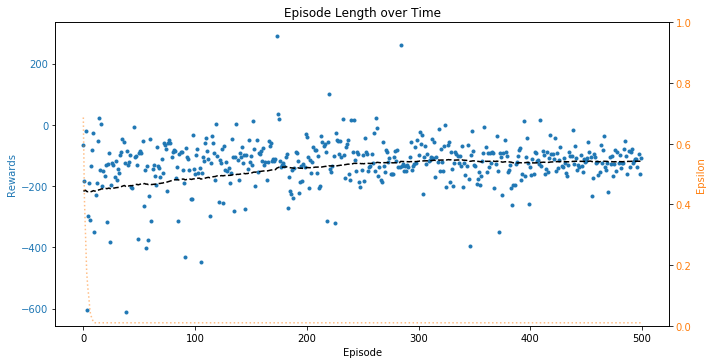

In [2]:
agent = deep_rico(env)
agent.train(500)

In [10]:
ngamma = 1/40
gamma = 1-ngamma
ngamma, gamma

(0.025, 0.975)

avg of last 100 episodes: -666.412126


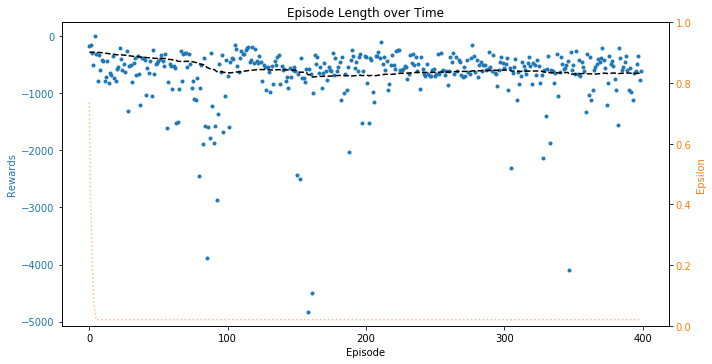

In [3]:
low_gamma = deep_rico(env)
low_gamma.policy.gamma = 0.999
low_gamma.policy.epsilon_min = 0.02 # Want it to be a bit more exploratory
low_gamma.train(400)

In [13]:
low_gamma.policy.model.save(r'models/lander-gamma-0999.h5')

In [ ]:
low_gamma.policy.model.load(r'models/lander-gamma-0999.h5')

In [4]:
low_gamma.demo()

score= -132.956930854
score= -434.900858462
score= -391.096617052
score= -666.975989673
score= -181.85976083
score= -13.2363047628
score= -585.660497475
score= -382.204120728
score= -750.520634218
score= -174.706688602
Avg rewards= -371.411840266


avg of last 100 episodes: -160.382036


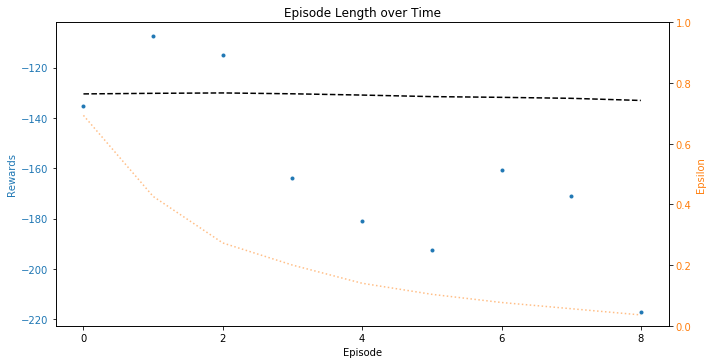

In [ ]:
low_gamma.epislon_min = 0.02
low_gamma.train(1000)

In [8]:
low_gamma.demo()

score= -197.27422295
score= -220.875879806
score= -236.592269344
score= -162.246322548
score= -555.075168334
score= -395.421059332
score= -446.243415914
score= -200.152564303
score= -144.700003041
score= -143.855718689
Avg rewards= -270.243662426


In [9]:
low_gamma.epislon_min = 0
low_gamma.demo()

score= -185.069822617
score= -183.774623105
score= -158.893362812
score= -147.947295085
score= -195.728052394
score= -181.516436339
score= -185.534694535
score= -207.255401844
score= -169.708029712
score= -217.496935954
Avg rewards= -183.29246544


In [5]:
noob = deep_rico(env) # save an untrained one for comparison

In [7]:
env.close()

In [3]:
agent.demo()

KeyboardInterrupt: 

avg of last 100 episodes: -185.124037


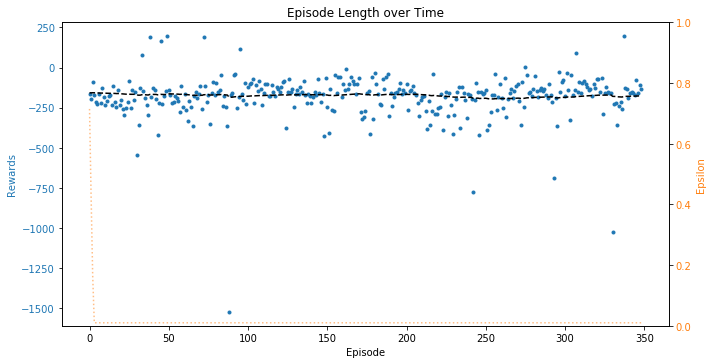

KeyboardInterrupt: 

In [12]:
agent.train(500)

In [21]:
run_episodes(agent, count=5)

score=-382.065324
score=-298.185657
score=-110.661777
score=-540.666944
score=-64.293288
Mean score=-279.174598


In [74]:
agent.policy.peek()

array([4.2793612, 4.8437734, 4.198536 , 4.87267  ], dtype=float32)

ValueError: operands could not be broadcast together with shapes (3,) (0,) 

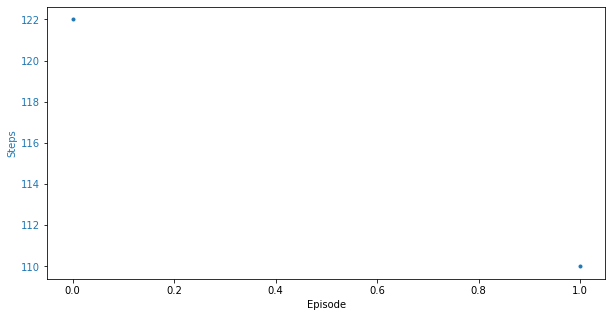

In [78]:
agent.train(200,render=True)

In [6]:
a = [1,2,3,4]
a[1:-2]

[2]

In [17]:
len(agent.policy.snapshots)

109055

In [24]:
agent.policy.snapshots[0:10]

TypeError: sequence index must be integer, not 'slice'

In [20]:
agent.policy.peek()

array([ 4.80480051,  4.95879793,  4.47204924,  4.80873108], dtype=float32)

In [4]:
env.close()